In [13]:
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, log_loss
from sklearn import svm #support vector machines
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data = pd.read_json('train.json') 

print("An example of what the data looks like:")
print("")
print(data)

print("")
print("Here the number of recepies of each cuisine")
print("")
print(data['cuisine'].value_counts())

An example of what the data looks like:

            cuisine     id                                        ingredients
0             greek  10259  [romaine lettuce, black olives, grape tomatoes...
1       southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...
2          filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
3            indian  22213                [water, vegetable oil, wheat, salt]
4            indian  13162  [black pepper, shallots, cornflour, cayenne pe...
5          jamaican   6602  [plain flour, sugar, butter, eggs, fresh ginge...
6           spanish  42779  [olive oil, salt, medium shrimp, pepper, garli...
7           italian   3735  [sugar, pistachio nuts, white almond bark, flo...
8           mexican  16903  [olive oil, purple onion, fresh pineapple, por...
9           italian  12734  [chopped tomatoes, fresh basil, garlic, extra-...
10          italian   5875  [pimentos, sweet pepper, dried oregano, olive ...
11          chinese  45

In [11]:
recipie_list_list = data.ingredients.values.tolist()
recipie_string_list = [" ".join(ing) for ing in recipie_list_list]
vectorizer = CountVectorizer(min_df = 0.00013)
X = vectorizer.fit_transform(recipie_string_list).toarray()
print(X.shape)

(39774, 1781)


In [9]:
head_recipie_list_list = (data.head()).ingredients.values.tolist()
head_recipie_string_list = [" ".join(ing) for ing in head_recipie_list_list]
vectorizer = CountVectorizer( ngram_range = (1, 1) )
head_X = vectorizer.fit_transform(head_recipie_string_list).toarray()

for recipie in head_recipie_string_list :
    print(recipie)
    print("")
    
print("")
print("The matrix looks like this:")
print(head_X)

print("")
print("The feature names are:")
print(vectorizer.get_feature_names())
    

romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles

plain flour ground pepper salt tomatoes ground black pepper thyme eggs green tomatoes yellow corn meal milk vegetable oil

eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder yellow onion soy sauce butter chicken livers

water vegetable oil wheat salt

black pepper shallots cornflour cayenne pepper onions garlic paste milk butter salt lemon juice water chili powder passata oil ground cumin boneless chicken skinless thigh garam masala double cream natural yogurt bay leaf


The matrix looks like this:
[[0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 2 0 0 0 0 0 0 0 1
  1 0 1 0 0 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0 1 2 1 0 0 1 0]
 [0 0 0 0 1 1 0 0 2 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0
  

# Heat map code

In [12]:
############## This is code to do neat plotting, taken from:
# https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py
############################################################################
############################################################################
############################################################################
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

############################################################################
############################################################################
############################################################################
##### plotting code over


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:111: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


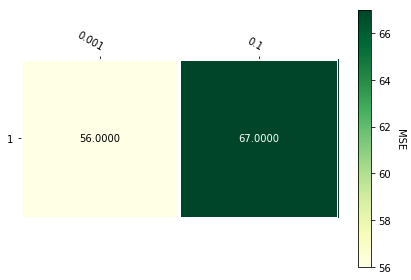

In [17]:
# now plot the mses in a heat map
fig, ax = plt.subplots()
im, cbar = heatmap(np.array([56,67]).reshape(1,2), np.array([1]), np.array([0.001, 00.1]) , ax=ax, cmap="YlGn", cbarlabel="MSE")
texts = annotate_heatmap(im, valfmt="{x:.4f}")
fig.tight_layout()
plt.show()


In [32]:
def get_design_matrix(data, cleaning_function = lambda x : x, min_df = 0.0, max_df = 1.0) :
    """
    Take a data frame data, and convert to a matrix. 
    Use cleaning_function to clear up data. 
    """
    recipie_list_list = data.ingredients.values.tolist()
    recipie_string_list = [cleaning_function(" ".join(ing)) for ing in recipie_list_list]
    vectorizer = CountVectorizer(min_df = min_df, max_df = max_df)
    X = vectorizer.fit_transform(recipie_string_list).toarray()
    return X, vectorizer.get_feature_names()

    
def test_parameters_svm(X_train, y_train, parmlist = [0.1]) :
    """
    Pick the best svm parameter from parmlist, using cross validation or something 
    """
    
def choose_parameters_forrests(X_train, y_train, parmlist = [(2,4)]) :
    """
    """

def clean(s) :
    s = s.replace("-", " ")
    return s.replace("33", "")
    
X, features = get_design_matrix(data, cleaning_function = clean, min_df = 0.00013)
print(X.shape)
print(features)
### Also want voting classifier

(39774, 1780)
['40', 'accent', 'achiote', 'acid', 'ackee', 'acorn', 'acting', 'active', 'added', 'adobo', 'agar', 'agave', 'aged', 'ahi', 'ai', 'aioli', 'ajwain', 'albacore', 'ale', 'aleppo', 'alfredo', 'all', 'allspice', 'almond', 'almonds', 'amaretti', 'amaretto', 'amchur', 'american', 'aminos', 'anaheim', 'ancho', 'anchovies', 'anchovy', 'and', 'andouille', 'anejo', 'angel', 'anglaise', 'angostura', 'anise', 'anjou', 'annatto', 'apple', 'apples', 'applesauce', 'applewood', 'apricot', 'apricots', 'arbol', 'arborio', 'armagnac', 'arrowroot', 'artichok', 'artichoke', 'artichokes', 'arugula', 'asadero', 'asafetida', 'asafoetida', 'asiago', 'asian', 'asparagus', 'atta', 'au', 'avocado', 'avocados', 'aã', 'baby', 'back', 'bacon', 'bags', 'baguette', 'baileys', 'baked', 'baking', 'balls', 'balsamic', 'balsamico', 'bamboo', 'banana', 'bananas', 'banger', 'bar', 'barbecue', 'barbecued', 'barilla', 'barley', 'bars', 'bartlett', 'base', 'basil', 'basmati', 'bass', 'baton', 'batter', 'bawang', 